In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import matplotlib as mpl
from sklearn.metrics import precision_recall_curve, auc

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
df= pd.read_csv('/content/drive/MyDrive/creditcard.csv')

In [15]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [16]:
df.shape

(284807, 31)

In [17]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [83]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   V1                 284807 non-null  float64
 1   V2                 284807 non-null  float64
 2   V3                 284807 non-null  float64
 3   V4                 284807 non-null  float64
 4   V5                 284807 non-null  float64
 5   V6                 284807 non-null  float64
 6   V7                 284807 non-null  float64
 7   V8                 284807 non-null  float64
 8   V9                 284807 non-null  float64
 9   V10                284807 non-null  float64
 10  V11                284807 non-null  float64
 11  V12                284807 non-null  float64
 12  V13                284807 non-null  float64
 13  V14                284807 non-null  float64
 14  V15                284807 non-null  float64
 15  V16                284807 non-null  float64
 16  V1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,0.001727,2.913952e-17
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02


In [19]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])

In [20]:
fraud_prc= fraud/(fraud+non_fraud)*100
fraud_prc

0.1727485630620034

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
df['normalized_amount']= scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [23]:
df.drop(['Amount','Time'], axis=1, inplace=True)

In [24]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalized_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [25]:
x=df.drop(["Class"],axis=1)

In [26]:
y=df["Class"]

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
x_train.shape

(199364, 29)

In [30]:
x_test.shape

(85443, 29)

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf1= RandomForestClassifier(n_estimators=100)

In [33]:
rf1.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
prediction_rf=rf1.predict(x_test)

In [35]:
rf_score=rf1.score(x_test,y_test)*100

In [36]:
rf_score

99.94850368081644

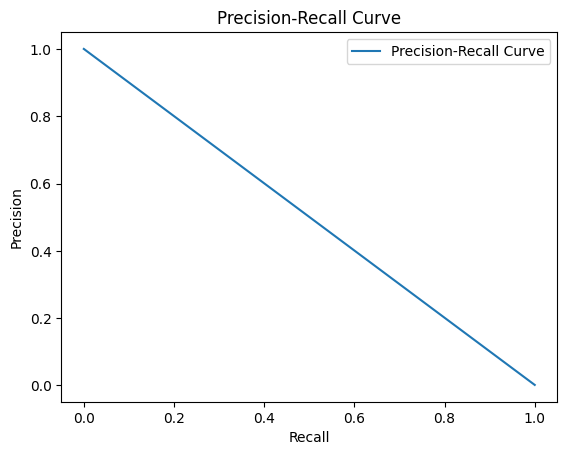

AUC-PR: 0.5007900003511113


In [71]:
precision, recall, thresholds = precision_recall_curve(y_test,prediction_rf)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
clf= LogisticRegression()

In [39]:
clf.fit(x_train,y_train)

LogisticRegression()

In [40]:
prediction_clf=clf.predict(x_test)

In [41]:
clf_score=clf.score(x_test,y_test)*100
clf_score

99.91456292499093

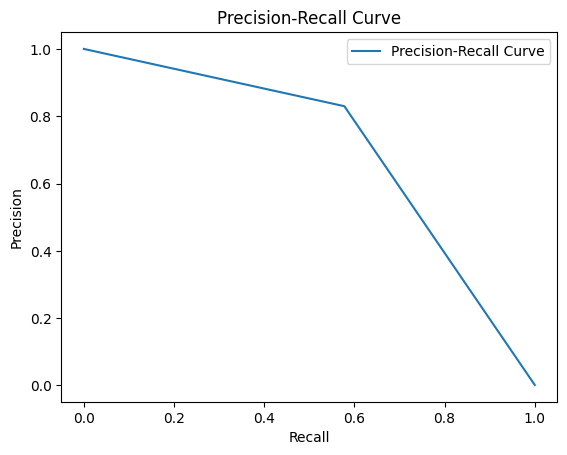

AUC-PR: 0.704116061613968


In [72]:
precision, recall, thresholds = precision_recall_curve(y_test,prediction_clf)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

In [42]:
from sklearn import linear_model

In [43]:
lasso_reg= linear_model.Lasso(alpha=100, max_iter=100, tol=1)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=100, max_iter=100, tol=1)

In [75]:
prediction_lasso=lasso_reg.predict(x_test)

In [74]:
lasso_score=lasso_reg.score(x_test,y_test)*100
lasso_score

-0.0028140549439337192

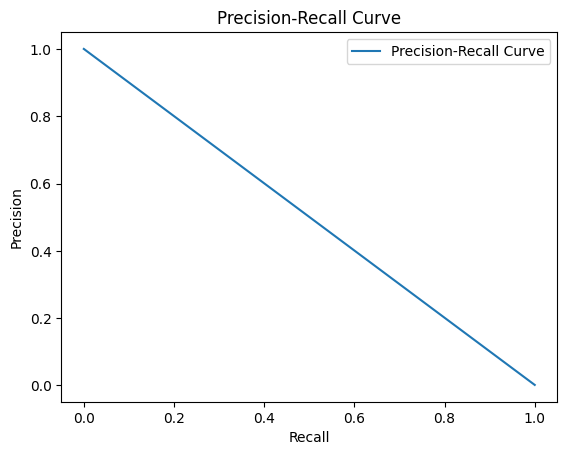

AUC-PR: 0.5007900003511113


In [76]:
precision, recall, thresholds = precision_recall_curve(y_test,prediction_lasso)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

In [46]:
ridge_reg= linear_model.Ridge(alpha=100, max_iter=100, tol=1)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=100, max_iter=100, tol=1)

In [77]:
prediction_ridge = ridge_reg.predict(x_test)


In [78]:
ridge_score=ridge_reg.score(x_test,y_test)*100
ridge_score

48.04401772005671

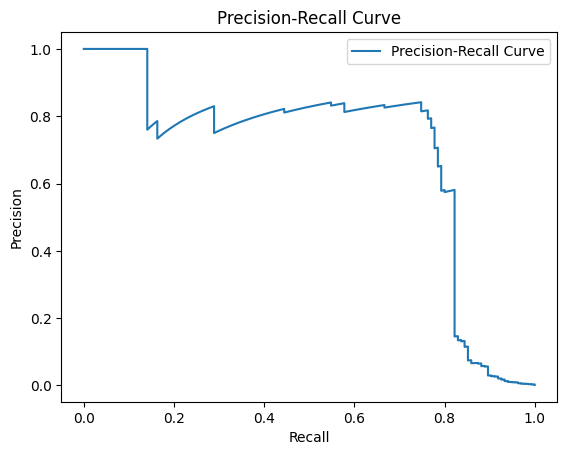

AUC-PR: 0.6907186109201815


In [79]:
precision, recall, thresholds = precision_recall_curve(y_test,prediction_ridge)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gbc= GradientBoostingClassifier(n_estimators=100)
gbc.fit( x_train,y_train)

GradientBoostingClassifier()

In [53]:
prediction_gbc=gbc.predict(x_test)

In [54]:
gbc_score=gbc.score(x_test,y_test)*100
gbc_score

99.85955549313577

In [51]:
from xgboost import XGBClassifier

In [52]:
xgb= XGBClassifier(n_estimators=100)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
xbg_prediction=xgb.predict(x_test)

In [57]:
xbg_score=xgb.score(x_test,y_test)*100
xbg_score

99.95786664794073

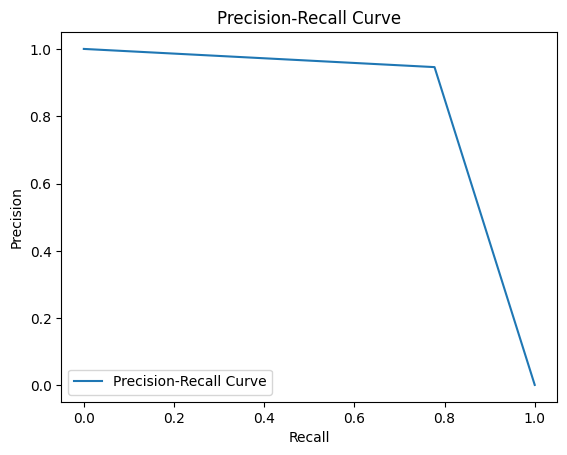

AUC-PR: 0.8620374174954422


In [80]:
precision, recall, thresholds = precision_recall_curve(y_test,xbg_prediction)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

In [58]:
from lightgbm import LGBMClassifier

In [59]:
lgbm= LGBMClassifier(n_estimators=100)
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 357, number of negative: 199007
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.058368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001791 -> initscore=-6.323359
[LightGBM] [Info] Start training from score -6.323359


LGBMClassifier()

In [60]:
lgbm_prediction=lgbm.predict(x_test)

In [61]:
lgbm_score=lgbm.score(x_test,y_test)*100
lgbm_score

99.6641035544164

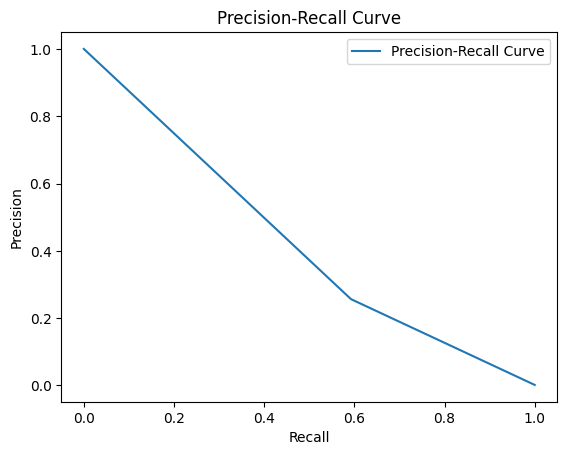

AUC-PR: 0.4248232764963217


In [81]:
precision, recall, thresholds = precision_recall_curve(y_test,lgbm_prediction)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

In [64]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(x_train,y_train)

SVC()

In [65]:
svc_prediction=svc.predict(x_test)

In [66]:
svc_score=svc.score(x_test,y_test)*100
svc_score

99.9403110845827

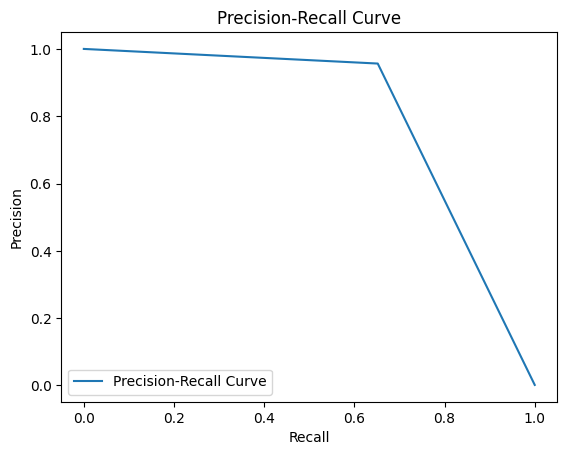

AUC-PR: 0.8044618326504192


In [82]:
precision, recall, thresholds = precision_recall_curve(y_test,svc_prediction)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)